Graph saved as sh_paper_04_fig_2_gem.svg


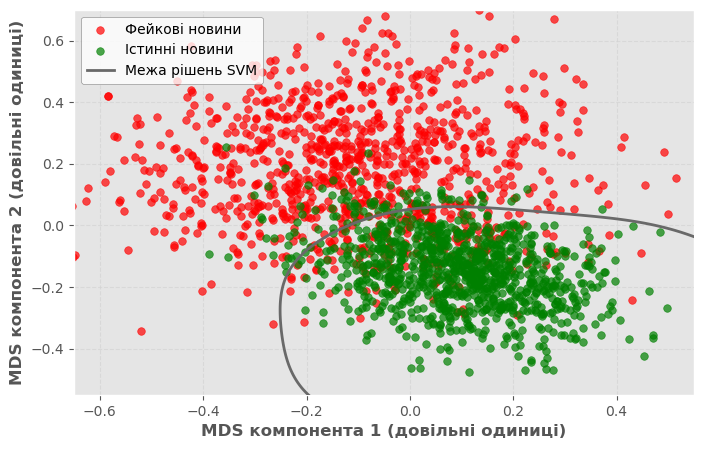

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs # We can use this and then transform
import matplotlib.lines as mlines # For creating custom legend handles

# --- 1. Generate Synthetic Data (same as before) ---
# Parameters for data generation (these are approximations based on the plot)
n_samples_total = 2000
n_samples_green = 1000
n_samples_red = n_samples_total - n_samples_green

# Green points (real news)
center_green = [0.1, -0.15]
std_dev_green = [[0.02, -0.005], [-0.005, 0.015]] # Make it a bit elliptical
X_green = np.random.multivariate_normal(center_green, std_dev_green, n_samples_green)
y_green = np.zeros(n_samples_green)

# Red points (fake news)
center_red1 = [-0.15, 0.25]
std_dev_red1 = [[0.04, 0.01], [0.01, 0.03]]
X_red1_count = int(n_samples_red * 0.7)
X_red1 = np.random.multivariate_normal(center_red1, std_dev_red1, X_red1_count)

# A smaller cluster of red points to create more overlap
center_red2 = [0.05, 0.05]
std_dev_red2 = [[0.03, 0.005], [0.005, 0.025]]
X_red2_count = n_samples_red - X_red1_count
X_red2 = np.random.multivariate_normal(center_red2, std_dev_red2, X_red2_count)

X_red = np.vstack((X_red1, X_red2))
y_red = np.ones(n_samples_red)

# Combine data
X = np.vstack((X_green, X_red))
y = np.concatenate((y_green, y_red))

# --- 2. Train an SVM Classifier (same as before) ---
clf = svm.SVC(kernel='rbf', C=1.5, gamma=15)
clf.fit(X, y)

# --- 3. Plotting with ggplot style and adjustments ---
plt.style.use('ggplot') # Apply ggplot style

plt.figure(figsize=(8,5)) # Adjusted figure size for potentially better aspect ratio

# Create a mesh to plot the decision boundary
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
boundary_color = 'dimgray' # Store color for legend
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors=boundary_color, zorder=3)

# Plot the data points
scatter_red = plt.scatter(X_red[:, 0], X_red[:, 1], c='red', s=30, alpha=0.7, label='Фейкові новини', zorder=2)
scatter_green = plt.scatter(X_green[:, 0], X_green[:, 1], c='green', s=30, alpha=0.7, label='Істинні новини', zorder=2)

# --- 4. Add Title, Legend, and Set Limits ---
# plt.title("SVM Decision Boundary", fontsize=16, fontweight='bold') # Title removed as per last script

# Create legend entries including the decision boundary
# Handles for the scatter plots are already created
legend_handles = [scatter_red, scatter_green]

# Create a custom handle for the decision boundary line
boundary_line = mlines.Line2D([], [], color=boundary_color, linestyle='-', linewidth=2, label='Межа рішень SVM')
legend_handles.append(boundary_line)

# Place legend in the top-left corner
plt.legend(handles=legend_handles, loc='upper left', frameon=True, facecolor='white', edgecolor='gray')

# Set axis limits to match the original image closely (ggplot may adjust these slightly)
plt.xlim(-0.65, 0.55)
plt.ylim(-0.55, 0.7)

# Set ticks to match original (ggplot might override with its own optimal ticks)
plt.xticks(np.arange(-0.6, 0.5 + 0.1, 0.2), fontsize=10)
plt.yticks(np.arange(-0.4, 0.6 + 0.1, 0.2), fontsize=10)

# Add grid lines - ggplot adds them by default, but we can customize
plt.grid(True, linestyle='--', color='lightgray', alpha=0.7, zorder=0) # zorder to be behind points

# Add axis labels (good practice, even if not in the original image)
plt.xlabel("MDS компонента 1 (довільні одиниці)", fontsize=12, fontweight='bold')
plt.ylabel("MDS компонента 2 (довільні одиниці)", fontsize=12, fontweight='bold')

# --- 5. Save as SVG ---
plt.savefig("sh_paper_04_fig_3_gem.svg", format="svg", bbox_inches='tight')
print("Graph saved as sh_paper_04_fig_2_gem.svg")

plt.show()